In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from datetime import datetime
plt.style.use(['fivethirtyeight'])

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)

import seaborn as sns



from scipy import stats
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from dask.diagnostics import ProgressBar
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, f1_score, roc_curve, auc, precision_score,recall_score


display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
oxidation = pd.read_csv('/home//Oxidation.csv').iloc[:,1:]; oxidation

FileNotFoundError: [Errno 2] No such file or directory: '/home/piai/바탕화면/빅데이터프로젝트/Oxidation.csv'

In [ ]:
oxidation.Ox_Chamber.value_counts()

In [ ]:
oxidation[oxidation.Ox_Chamber == 1]['Oxid_time'].mean()

In [359]:
oxidation[oxidation.Ox_Chamber == 2]['Oxid_time'].mean()

97.0313043478261

In [360]:
oxidation[oxidation.Ox_Chamber == 3]['Oxid_time'].mean()

102.14885496183206

In [144]:
softbake = pd.read_csv('/home/Photo_softbake.csv').iloc[:,1:];softbake

,No_Die,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,13,28,01-03-2021
1,NOLSM326132326,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,13,29,01-03-2021
2,NOLSM327133327,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,13,30,01-03-2021
3,NOLSM328134328,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,13,31,01-03-2021
4,NOLSM329135329,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,13,32,01-03-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Photo,0.89644,16.029,15.005,19.998,204.429,90.000,504.429,4088.587,5110.734,5.114,93.622,29.996,32,11,28-02-2021
1700,NOLSM8493212,1,Photo,1.02384,17.587,14.949,20.000,204.266,90.000,504.266,4085.330,5106.662,5.083,93.227,29.994,32,12,28-02-2021
1701,NOLSM8503213,1,Photo,1.02634,16.445,14.978,19.994,203.401,90.000,503.401,4068.014,5085.017,5.098,93.547,29.992,32,13,28-02-2021
1702,NOLSM8513214,1,Photo,0.56833,15.306,15.050,20.002,203.670,90.000,503.670,4073.408,5091.760,5.107,93.487,30.007,32,14,28-02-2021


In [145]:
lithograpy = pd.read_csv('/home/piai/바탕화면/빅데이터프로젝트/Photo_lithograpy.csv').iloc[:,1:];softbake

,No_Die,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,13,28,01-03-2021
1,NOLSM326132326,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,13,29,01-03-2021
2,NOLSM327133327,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,13,30,01-03-2021
3,NOLSM328134328,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,13,31,01-03-2021
4,NOLSM329135329,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,13,32,01-03-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Photo,0.89644,16.029,15.005,19.998,204.429,90.000,504.429,4088.587,5110.734,5.114,93.622,29.996,32,11,28-02-2021
1700,NOLSM8493212,1,Photo,1.02384,17.587,14.949,20.000,204.266,90.000,504.266,4085.330,5106.662,5.083,93.227,29.994,32,12,28-02-2021
1701,NOLSM8503213,1,Photo,1.02634,16.445,14.978,19.994,203.401,90.000,503.401,4068.014,5085.017,5.098,93.547,29.992,32,13,28-02-2021
1702,NOLSM8513214,1,Photo,0.56833,15.306,15.050,20.002,203.670,90.000,503.670,4073.408,5091.760,5.107,93.487,30.007,32,14,28-02-2021


In [146]:
QI = pd.read_csv('/home/piai/바탕화면/빅데이터프로젝트/QualityInspection.csv').iloc[:,1:]; QI

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...


In [147]:
QI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No_Die         1704 non-null   object
 1   Lot_Num        1704 non-null   int64 
 2   Wafer_Num      1704 non-null   int64 
 3   Datetime       1704 non-null   object
 4   Target         1704 non-null   int64 
 5   Error_message  1704 non-null   object
 6   Wafer_map      1704 non-null   object
dtypes: int64(3), object(4)
memory usage: 93.3+ KB


In [148]:
QI['Datetime_tranfrom'] = QI['Datetime'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

# 결측치 확인

In [149]:
QI.isnull().sum()

No_Die               0
Lot_Num              0
Wafer_Num            0
Datetime             0
Target               0
Error_message        0
Wafer_map            0
Datetime_tranfrom    0
dtype: int64

In [150]:
temp = df[df['chamber_path'] == 23222].reset_index(drop=True)QI.describe()

,Lot_Num,Wafer_Num,Target
count,1704.000000,1704.000000,1704.000000
mean,16.281690,27.394366,103.073944
std,9.114164,15.586611,64.704118
min,1.000000,1.000000,0.000000
25%,8.000000,14.000000,64.000000
50%,16.000000,27.500000,94.000000
75%,24.000000,41.000000,126.000000
max,32.000000,54.000000,666.000000


# ID 확인

In [151]:
QI.No_Die.nunique()

1704

# Lot_Num 확인

In [152]:
QI.Lot_Num.nunique()

32

In [153]:
QI.Lot_Num.value_counts()

13    54
14    54
12    54
31    54
11    54
30    54
10    54
29    54
9     54
28    54
8     54
27    54
7     54
26    54
6     54
25    54
5     54
24    54
4     54
23    54
3     54
22    54
2     54
21    54
1     54
20    54
19    54
18    54
17    54
16    54
15    54
32    30
Name: Lot_Num, dtype: int64

<AxesSubplot:ylabel='Lot_Num'>

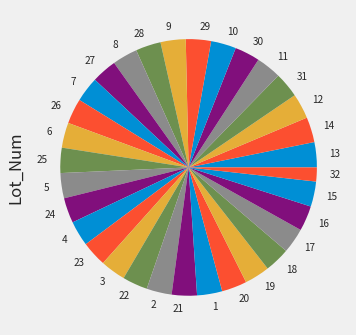

In [154]:
QI.Lot_Num.value_counts().plot.pie()

#  Wafer_num 확인

In [155]:
QI.Wafer_Num.nunique()

54

In [156]:
QI.Wafer_Num.value_counts()

28    32
29    32
15    32
14    32
13    32
12    32
11    32
10    32
9     32
8     32
7     32
6     32
5     32
4     32
3     32
2     32
1     32
36    32
30    32
32    32
33    32
34    32
35    32
37    32
38    32
39    32
40    32
41    32
42    32
31    32
17    31
18    31
19    31
20    31
21    31
22    31
16    31
23    31
24    31
25    31
26    31
45    31
46    31
43    31
44    31
54    31
53    31
52    31
51    31
50    31
49    31
48    31
47    31
27    31
Name: Wafer_Num, dtype: int64

<AxesSubplot:ylabel='Wafer_Num'>

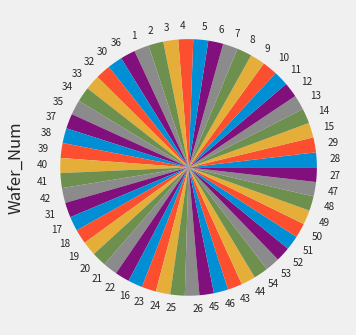

In [157]:
QI.Wafer_Num.value_counts().plot.pie()

<AxesSubplot:>

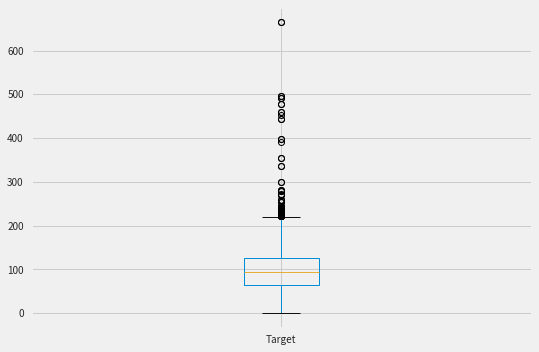

In [158]:
QI[['Target']].boxplot()

In [159]:
QI['Wafer_수율'] = 1 - (QI['Target'] / 2000)

<AxesSubplot:>

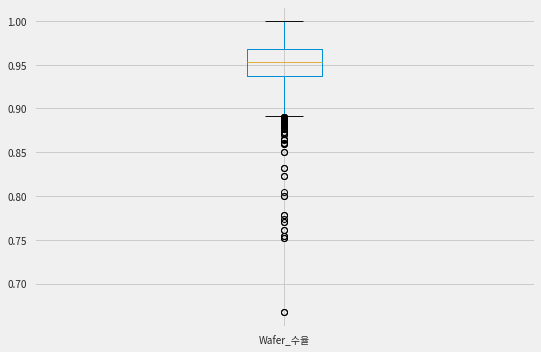

In [160]:
QI[['Wafer_수율']].boxplot()

In [161]:
Q1 = np.percentile(QI['Target'], 25)
Q3 = np.percentile(QI['Target'], 75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR

outlier_index = QI[(QI['Target'] < Q1 - outlier_step) | (QI['Target'] > Q3 + outlier_step)].index

In [162]:
QI.loc[outlier_index].Error_message.value_counts()

[['Edge-Loc']]     33
[['Loc']]          17
[['Scratch']]       7
[['Center']]        4
[['Random']]        4
[['Near-full']]     2
[['Edge-Ring']]     2
Name: Error_message, dtype: int64

In [163]:
outlier_step

93.0

In [164]:
QI['Target'] > np.percentile(QI['Target'], 75)

0        True
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: Target, Length: 1704, dtype: bool

In [165]:
QI['Target'] < np.percentile(QI['Target'], 25)

0       False
1        True
2       False
3       False
4       False
        ...  
1699    False
1700     True
1701     True
1702     True
1703    False
Name: Target, Length: 1704, dtype: bool

In [166]:
outlier_index = []



In [167]:
np.percentile(QI['Target'], 25)

64.0

In [168]:
np.percentile(QI['Target'], 75)

126.0

# QI 에러비율 분포

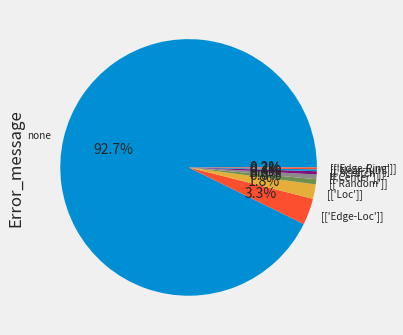

In [169]:
QI.Error_message.value_counts().plot.pie(autopct = '%.1f%%')
plt.show()

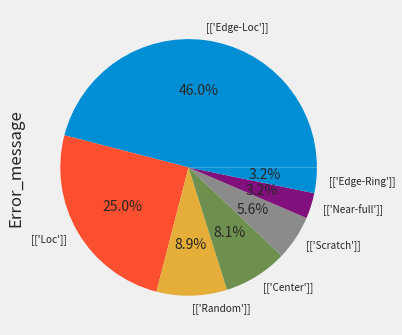

In [170]:
QI[QI.Error_message != 'none'].Error_message.value_counts().plot.pie(autopct = '%.1f%%')
plt.show()

In [171]:
sum(QI.Target > 195)

121

In [172]:
QI

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9295
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9725
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9520
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9475
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2021-03-01,0.9605
...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-28,0.9610
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2021-02-28,0.9790
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9790
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9880


In [173]:
QI.drop_duplicates()

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9295
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9725
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9520
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9475
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2021-03-01,0.9605
...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-28,0.9610
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2021-02-28,0.9790
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9790
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9880


In [174]:
QI

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9295
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9725
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9520
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9475
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2021-03-01,0.9605
...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-28,0.9610
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2021-02-28,0.9790
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9790
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9880


In [361]:
temp = QI.copy()

In [362]:
temp

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9295
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9725
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9520
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9475
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2021-03-01,0.9605
...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-28,0.9610
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2021-02-28,0.9790
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9790
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9880


In [218]:
temp[temp.Error_message != 'none']

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear
16,NOLSM3411317341,13,44,01-03-2021,238,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 0 0 0 0 0 0 ...,2021-03-01,0.8810,불량품,09
43,NOLSM3411317,13,17,01-03-2021,238,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 0 0 0 0 0 0 ...,2021-03-01,0.8810,불량품,09
59,NOLSM357146357,14,33,02-03-2021,218,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8910,불량품,09
77,NOLSM3751424375,14,51,02-03-2021,215,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8925,불량품,09
86,NOLSM357146,14,6,02-03-2021,218,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8910,불량품,09
...,...,...,...,...,...,...,...,...,...,...,...
1566,NOLSM271111,11,1,27-02-2021,221,[['Edge-Ring']],[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-27,0.8895,불량품,08
1619,NOLSM8373127,31,27,27-02-2021,207,[['Near-full']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-27,0.8965,불량품,08
1646,NOLSM3241227324,12,54,28-02-2021,217,[['Edge-Ring']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2 0 0 0 0 0 0 ...,2021-02-28,0.8915,불량품,09
1678,NOLSM3141217,12,17,28-02-2021,242,[['Scratch']],[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-28,0.8790,불량품,09


In [222]:
temp['Wafer_map'][0].find('1')

22

In [223]:
temp['Wafer_map'][0].find('2')

24

In [229]:
temp['Wafer_map'][0].split('\n')[0].count('1')

4

In [235]:
temp['Wafer_map'][0].count('1') / (temp['Wafer_map'][0].count('1') + temp['Wafer_map'][0].count('2'))

0.851782363977486

In [239]:
temp['Wafer_map'].apply(lambda x: x.count('1'))


0       454
1       439
2       463
3       439
4       447
       ... 
1699    425
1700    461
1701    451
1702    439
1703    391
Name: Wafer_map, Length: 1704, dtype: int64

In [242]:
temp['Wafer_map'].apply(lambda x: x.count('2'))

0        79
1        94
2        70
3        94
4        86
       ... 
1699    108
1700     72
1701     82
1702     94
1703    142
Name: Wafer_map, Length: 1704, dtype: int64

In [245]:
temp['wafer_ratio'] = temp['Wafer_map'].apply(lambda x: x.count('1')) / (temp['Wafer_map'].apply(lambda x: x.count('2')) + temp['Wafer_map'].apply(lambda x: x.count('1')))


In [288]:
temp

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear,wafer_ratio
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9295,양품,09,0.851782
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9725,양품,09,0.823640
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9520,양품,09,0.868668
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9475,양품,09,0.823640
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2021-03-01,0.9605,양품,09,0.838649
...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-28,0.9610,양품,09,0.797373
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2021-02-28,0.9790,양품,09,0.864916
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9790,양품,09,0.846154
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9880,양품,09,0.823640


In [295]:
QI

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9295
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9725
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9520
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9475
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2021-03-01,0.9605
...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-28,0.9610
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2021-02-28,0.9790
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9790
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9880


In [296]:
QI.Wafer_map[0].count('2') + QI.Wafer_map[0].count('1')

533

In [297]:
temp

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear,wafer_ratio
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9295,양품,09,0.851782
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9725,양품,09,0.823640
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9520,양품,09,0.868668
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9475,양품,09,0.823640
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2021-03-01,0.9605,양품,09,0.838649
...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-28,0.9610,양품,09,0.797373
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2021-02-28,0.9790,양품,09,0.864916
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9790,양품,09,0.846154
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9880,양품,09,0.823640


In [299]:
temp['count_1_2'] = temp['Wafer_map'].str.count('1') + temp['Wafer_map'].str.count('2')

In [305]:
temp[temp['count_1_2'] != 533][~temp[temp['count_1_2'] != 533]['wafer_ratio'].isnull()]

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear,wafer_ratio,count_1_2


In [270]:
temp_temp = temp[~temp.wafer_ratio.isnull()]

In [283]:
temp_temp.reset_index(drop=True)

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear,wafer_ratio
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9295,양품,09,0.851782
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9725,양품,09,0.823640
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9520,양품,09,0.868668
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9475,양품,09,0.823640
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2021-03-01,0.9605,양품,09,0.838649
...,...,...,...,...,...,...,...,...,...,...,...,...
1408,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-28,0.9610,양품,09,0.797373
1409,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2021-02-28,0.9790,양품,09,0.864916
1410,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9790,양품,09,0.846154
1411,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9880,양품,09,0.823640


In [285]:
temp_temp.reset_index(drop=True)[temp_temp.reset_index(drop=True)['Error_message'] != 'none'].wafer_ratio.mean()

0.6968266456858118

In [ ]:
temp_temp.reset_index(drop=True)[temp_temp.reset_index(drop=True)['Error_message'] != 'none'].wafer_ratio.min()

In [ ]:
temp_temp = temp[temp.wafer_ratio.isnull()]

In [289]:
temp_temp.reset_index(drop=True)[temp_temp.reset_index(drop=True)['Error_message'] == 'none'].wafer_ratio.min()

0.7091932457786116

In [291]:
QI.Error_message.value_counts()

none               1580
[['Edge-Loc']]       57
[['Loc']]            31
[['Random']]         11
[['Center']]         10
[['Scratch']]         7
[['Near-full']]       4
[['Edge-Ring']]       4
Name: Error_message, dtype: int64

In [290]:
temp_temp.Error_message.value_counts()

none               1320
[['Edge-Loc']]       41
[['Loc']]            23
[['Random']]         11
[['Scratch']]         6
[['Center']]          6
[['Near-full']]       4
[['Edge-Ring']]       2
Name: Error_message, dtype: int64

In [287]:
temp_temp.reset_index(drop=True)[temp_temp.reset_index(drop=True)['Error_message'] != 'none'].wafer_ratio.max()

0.8217636022514071

In [266]:
print(temp[temp.wafer_ratio.isnull()].reset_index(drop=True).loc[0]['Wafer_map'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [281]:
temp_temp_o = temp[temp.wafer_ratio.isnull()]

In [282]:
temp_temp_o

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear,wafer_ratio
432,NOLSM1111,1,28,17-02-2021,96,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-17,0.9520,양품,07,NaN
433,NOLSM2122,1,29,17-02-2021,102,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-17,0.9490,양품,07,NaN
434,NOLSM3133,1,30,17-02-2021,95,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-17,0.9525,양품,07,NaN
435,NOLSM4144,1,31,17-02-2021,117,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-17,0.9415,양품,07,NaN
436,NOLSM5155,1,32,17-02-2021,143,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-17,0.9285,양품,07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,NOLSM249106,10,6,26-02-2021,229,[['Center']],[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-26,0.8855,불량품,08,NaN
1473,NOLSM2591016,10,16,26-02-2021,230,[['Loc']],[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-26,0.8850,불량품,08,NaN
1512,NOLSM271111271,11,28,27-02-2021,221,[['Edge-Ring']],[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-27,0.8895,불량품,08,NaN
1566,NOLSM271111,11,1,27-02-2021,221,[['Edge-Ring']],[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-27,0.8895,불량품,08,NaN


In [307]:
temp

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear,wafer_ratio,count_1_2
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9295,양품,09,0.851782,533
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9725,양품,09,0.823640,533
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9520,양품,09,0.868668,533
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9475,양품,09,0.823640,533
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2021-03-01,0.9605,양품,09,0.838649,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-28,0.9610,양품,09,0.797373,533
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2021-02-28,0.9790,양품,09,0.864916,533
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9790,양품,09,0.846154,533
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9880,양품,09,0.823640,533


In [ ]:
# 불량품끼리의 타겟평균

# 양품끼리 타겟평균

In [309]:
temp[temp['Error_message'] == 'none'].Target.mean()

90.6379746835443

In [312]:
(533- 90.6379746835443) / 533

0.82994751466502

In [313]:
(533- 261.53225806451616) / 533

0.5093203413423711

In [314]:
temp['Error_message'].value_counts()

none               1580
[['Edge-Loc']]       57
[['Loc']]            31
[['Random']]         11
[['Center']]         10
[['Scratch']]         7
[['Near-full']]       4
[['Edge-Ring']]       4
Name: Error_message, dtype: int64

In [316]:
temp[temp['Error_message'] == "[['Edge-Loc']]"]

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear,wafer_ratio,count_1_2
16,NOLSM3411317341,13,44,01-03-2021,238,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 0 0 0 0 0 0 ...,2021-03-01,0.8810,불량품,09,0.791745,533
43,NOLSM3411317,13,17,01-03-2021,238,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 0 0 0 0 0 0 ...,2021-03-01,0.8810,불량품,09,0.791745,533
59,NOLSM357146357,14,33,02-03-2021,218,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8910,불량품,09,0.754221,533
77,NOLSM3751424375,14,51,02-03-2021,215,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8925,불량품,09,0.784240,533
86,NOLSM357146,14,6,02-03-2021,218,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8910,불량품,09,0.754221,533
96,NOLSM3671416,14,16,02-03-2021,202,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8990,불량품,09,0.697936,533
98,NOLSM3691418,14,18,02-03-2021,272,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8640,불량품,09,0.577861,533
104,NOLSM3751424,14,24,02-03-2021,215,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8925,불량품,09,0.784240,533
168,NOLSM412167412,16,34,04-03-2021,234,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 2 0 0 0 0 0 0 ...,2021-03-04,0.8830,불량품,09,0.754221,533
195,NOLSM412167,16,7,04-03-2021,234,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 2 0 0 0 0 0 0 ...,2021-03-04,0.8830,불량품,09,0.754221,533


In [345]:
temp

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear,wafer_ratio,count_1_2
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9295,양품,09,0.851782,533
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9725,양품,09,0.823640,533
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9520,양품,09,0.868668,533
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2021-03-01,0.9475,양품,09,0.823640,533
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2021-03-01,0.9605,양품,09,0.838649,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-28,0.9610,양품,09,0.797373,533
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2021-02-28,0.9790,양품,09,0.864916,533
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9790,양품,09,0.846154,533
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2021-02-28,0.9880,양품,09,0.823640,533


In [317]:
temp[temp['Error_message'] == "[['Loc']]"].Target.mean()

286.35483870967744

In [324]:
temp[temp['Error_message'] == "[['Loc']]"].Target.min()

200

In [318]:
temp[temp['Error_message'] == "[['Random']]"].Target.mean()

256.8181818181818

In [325]:
temp[temp['Error_message'] == "[['Random']]"].Target.min()

195

In [319]:
temp[temp['Error_message'] == "[['Center']]"].Target.mean()

222.0

In [326]:
temp[temp['Error_message'] == "[['Center']]"].Target.min()

200

In [320]:
temp[temp['Error_message'] == "[['Scratch']]"].Target.mean()

262.0

In [327]:
temp[temp['Error_message'] == "[['Scratch']]"].Target.min()

242

In [321]:
temp[temp['Error_message'] == "[['Near-full']]"].Target.mean()

216.0

In [328]:
temp[temp['Error_message'] == "[['Near-full']]"].Target.min()

207

In [322]:
temp[temp['Error_message'] == "[['Edge-Ring']]"].Target.mean()

219.0

In [329]:
temp[temp['Error_message'] == "[['Edge-Ring']]"].Target.min()

217

In [344]:
temp[temp['Error_message'] != "none"].Target.min()

195

In [343]:
temp[temp['Error_message'] == "none"].Target.max()

193

In [335]:
temp[temp['Error_message'] == "none"].sort_values(by = 'Target', ascending=True).head(20)

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear,wafer_ratio,count_1_2
1331,NOLSM765299765,29,36,25-02-2021,0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-02-25,1.0000,양품,08,0.857411,533
1385,NOLSM765299,29,9,25-02-2021,0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-02-25,1.0000,양품,08,0.857411,533
1330,NOLSM764298764,29,35,25-02-2021,6,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 0 0 0 0 0 0 ...,2021-02-25,0.9970,양품,08,0.799250,533
1388,NOLSM7682912,29,12,25-02-2021,6,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 1 0 0 0 0 0 0 ...,2021-02-25,0.9970,양품,08,0.804878,533
1387,NOLSM7672911,29,11,25-02-2021,6,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-02-25,0.9970,양품,08,0.789869,533
1506,NOLSM8053022,30,22,26-02-2021,6,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-02-26,0.9970,양품,08,0.844278,533
1334,NOLSM7682912768,29,39,25-02-2021,6,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 1 0 0 0 0 0 0 ...,2021-02-25,0.9970,양품,08,0.804878,533
1333,NOLSM7672911767,29,38,25-02-2021,6,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-02-25,0.9970,양품,08,0.789869,533
1384,NOLSM764298,29,8,25-02-2021,6,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 0 0 0 0 0 0 ...,2021-02-25,0.9970,양품,08,0.799250,533
1452,NOLSM8053022805,30,49,26-02-2021,6,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2021-02-26,0.9970,양품,08,0.844278,533


In [341]:
sum(temp.count_1_2 != 533)

291

In [342]:
291 / 1704

0.17077464788732394

In [310]:
temp[temp['Error_message'] != 'none'].Target.mean()

261.53225806451616

In [ ]:
temp.loc[]

In [215]:
temp[temp.Target > 195]

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Datetime_tranfrom,Wafer_수율,Error_01,weekofyear
16,NOLSM3411317341,13,44,01-03-2021,238,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 0 0 0 0 0 0 ...,2021-03-01,0.8810,불량품,09
43,NOLSM3411317,13,17,01-03-2021,238,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 0 0 0 0 0 0 ...,2021-03-01,0.8810,불량품,09
59,NOLSM357146357,14,33,02-03-2021,218,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8910,불량품,09
77,NOLSM3751424375,14,51,02-03-2021,215,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8925,불량품,09
86,NOLSM357146,14,6,02-03-2021,218,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 0 0 0 0 0 0 ...,2021-03-02,0.8910,불량품,09
...,...,...,...,...,...,...,...,...,...,...,...
1566,NOLSM271111,11,1,27-02-2021,221,[['Edge-Ring']],[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-27,0.8895,불량품,08
1619,NOLSM8373127,31,27,27-02-2021,207,[['Near-full']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,2021-02-27,0.8965,불량품,08
1646,NOLSM3241227324,12,54,28-02-2021,217,[['Edge-Ring']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2 0 0 0 0 0 0 ...,2021-02-28,0.8915,불량품,09
1678,NOLSM3141217,12,17,28-02-2021,242,[['Scratch']],[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,2021-02-28,0.8790,불량품,09


In [177]:
temp['Error_01'] = temp['Error_message'].apply(lambda x: '양품' if x == 'none' else '불량품')

<AxesSubplot:>

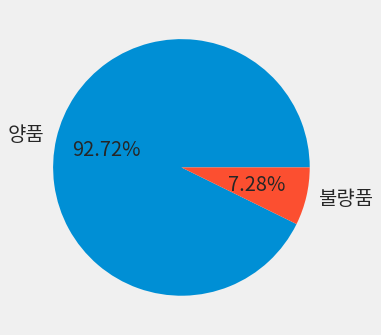

In [213]:
temp.Error_01.value_counts().plot.pie(autopct = '%0.2f%%', ylabel='', textprops={'fontsize': 20})

In [363]:
df = pd.read_csv('final_merged_dataset.csv')

In [364]:
df['Datetime_tranfrom'] = df['Datetime'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [365]:
df['weekofyear'] = df['Datetime_tranfrom'].apply(lambda x: x.strftime('%U'))

In [367]:
df.weekofyear.value_counts()

08    734
07    423
09    393
10    108
Name: weekofyear, dtype: int64

In [368]:
temp_07 = df[df['weekofyear'] == '07'];df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate,Datetime_tranfrom,weekofyear
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,...,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0705,2021-03-01,09
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,...,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,0.0275,2021-03-01,09
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,...,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,0.0480,2021-03-01,09
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,...,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0525,2021-03-01,09
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,...,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,0.0395,2021-03-01,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,NOLSM3081211,1,Oxidation,dry,1160.350439,O2,34.56,0.199,18,710.197,...,582,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...,2902,13311,0,0.0525,2021-02-28,09
1654,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,...,550,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2878,11133,0,0.0210,2021-02-28,09
1655,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,...,542,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2821,11222,0,0.0210,2021-02-28,09
1656,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,...,582,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2938,11311,0,0.0120,2021-02-28,09


In [379]:
suyoul_07 = 1 - (sum(temp_07['defective']) / len(temp_07))

In [380]:
suyoul_08 = 1 - (sum(temp_08['defective']) / len(temp_08))

In [381]:
suyoul_09 = 1 - (sum(temp_09['defective']) / len(temp_09))

In [382]:
suyoul_10 = 1 - (sum(temp_10['defective']) / len(temp_10))

In [383]:
x = [suyoul_07, suyoul_08, suyoul_09, suyoul_10];x

[0.9456264775413712,
 0.9073569482288828,
 0.9541984732824428,
 0.8888888888888888]

In [386]:
aaaa = pd.DataFrame(columns = ['주차','불량률']);aaaa

,주차,불량률


In [394]:
aaaa['주차'] = ['7주차', '8주차', '9주차','10주차']
aaaa['불량률'] = x


In [396]:
aaaa

,주차,불량률
0,7주차,0.945626
1,8주차,0.907357
2,9주차,0.954198
3,10주차,0.888889


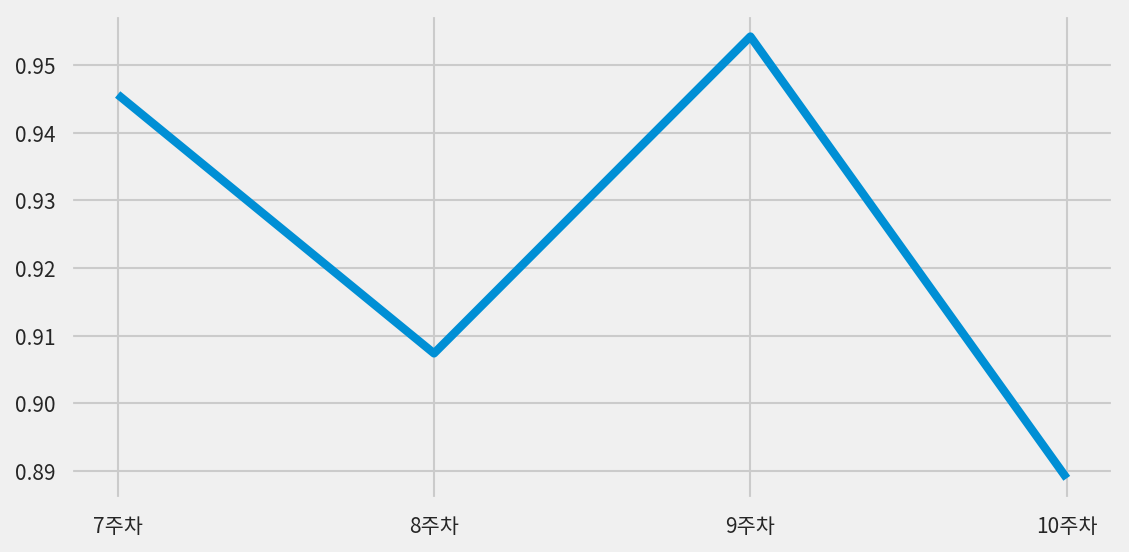

In [395]:
plt.figure(dpi=150, figsize=(8,4))
plt.plot(aaaa['주차'], aaaa['불량률'])
plt.show()


In [134]:
QI['Error_01'] = QI['Error_message'].apply(lambda x: 1 if x == 'none' else )

0       1
1       1
2       1
3       1
4       1
       ..
1699    1
1700    1
1701    1
1702    1
1703    1
Name: Error_message, Length: 1704, dtype: int64

In [ ]:
QI['Error_01'] = QI.apply(lambda x: 1 if x == 'none' else 0)

# 시간칼럼

In [93]:
QI.Datetime_tranfrom.min()

Timestamp('2021-02-17 00:00:00')

In [94]:
QI.Datetime_tranfrom.max()

Timestamp('2021-03-08 00:00:00')

# 전체 공정에 대한 실수율 분석

In [58]:
print('전체 공정의 수율 : ' ,round(1580 / 1704,3))

전체 공정의 수율 :  0.927


In [62]:
QI.groupby(['Lot_Num'])['Wafer_수율'].mean().reset_index().rename({'Wafer_수율' : 'Wafer_수율평균'}, axis=1)

,Lot_Num,Wafer_수율평균
0,1,0.945426
1,2,0.945074
2,3,0.941426
3,4,0.946944
4,5,0.943519
5,6,0.950741
6,7,0.947926
7,8,0.946500
8,9,0.941315
9,10,0.950648


In [63]:
QI.groupby(['Wafer_Num'])['Wafer_수율'].mean().reset_index().rename({'Wafer_수율' : 'Wafer_수율평균'}, axis=1)

,Wafer_Num,Wafer_수율평균
0,1,0.934625
1,2,0.947313
2,3,0.952438
3,4,0.941875
4,5,0.942969
5,6,0.945000
6,7,0.943516
7,8,0.945891
8,9,0.946297
9,10,0.943688
